# EDA
Now that our data has been cleaned, we can begin the EDA process.

### Packages

In [68]:
# Set Up
import pandas as pd
import numpy as np

# Graphing
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10,10)
import seaborn as sns
import plotly as px


## Loading Data
Various forms of data is often necessary. In my cleaning phase, I one-hot encoded features such as hair color to be able to impute missing values but now I'm going to reverse that for the sake of EDA.

In [69]:
sqf = pd.read_csv('../data/cleaned_reagg.csv').drop('Unnamed: 0', axis = 1)
#sqf.columns.to_list()

In [70]:
officer = sqf.groupby('issuing_officer_rank')['consent_given_flg','ask_for_consent_flg','weapon_found_flag'].agg('sum')
sqf_by_rank =  sqf.groupby('issuing_officer_rank').agg('count').iloc[:,0]
by_officer = pd.concat([sqf_by_rank, officer], axis = 1).rename({'stop_id_anony': 'total'}, axis = 1)

In [71]:
by_officer['Success Rate'] = by_officer['weapon_found_flag'] / by_officer['total']
by_officer = by_officer.sort_values('Success Rate', ascending = False)
by_officer

,total,consent_given_flg,ask_for_consent_flg,weapon_found_flag,Success Rate
issuing_officer_rank,,,,,
CPT,12,0.0,0.0,2.0,0.166667
DT2,6,3.0,3.0,1.0,0.166667
DTS,219,46.0,27.0,22.0,0.100457
LSA,10,3.0,1.0,1.0,0.100000
POM,11233,2301.0,1766.0,1048.0,0.093297
SGT,273,42.0,34.0,25.0,0.091575
DT3,96,23.0,17.0,8.0,0.083333
LT,97,15.0,10.0,8.0,0.082474
POF,1403,295.0,251.0,96.0,0.068425


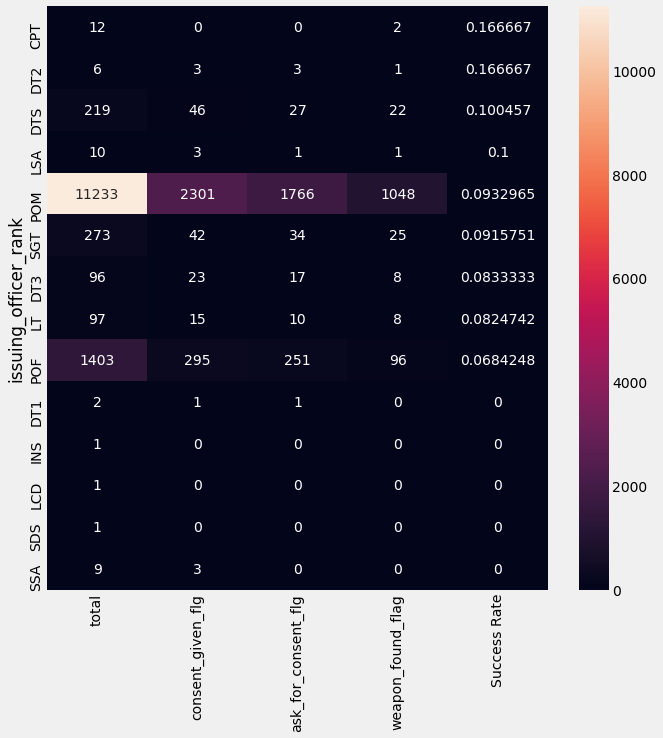

In [75]:
sns.heatmap(by_officer, annot=True,  fmt='g')

From this chart alone, I don't think its safe to analyze about groups other than DTS, POM, SGT, and POF because there isn't much data for the other groups. For now let's focus on those groups, as they are doing the majority of the SQF practioners and therefore given treatments will result in the most change in behaviors.

In [72]:
officers_subset = sqf[(sqf['issuing_officer_rank'] == "DTS") | 
               (sqf['issuing_officer_rank'] == "SGT") | 
               (sqf['issuing_officer_rank'] == "POF") | 
               (sqf['issuing_officer_rank'] == "POM")]

officers_subset['issuing_officer_rank'].value_counts()

POM    11233
POF     1403
SGT      273
DTS      219
Name: issuing_officer_rank, dtype: int64

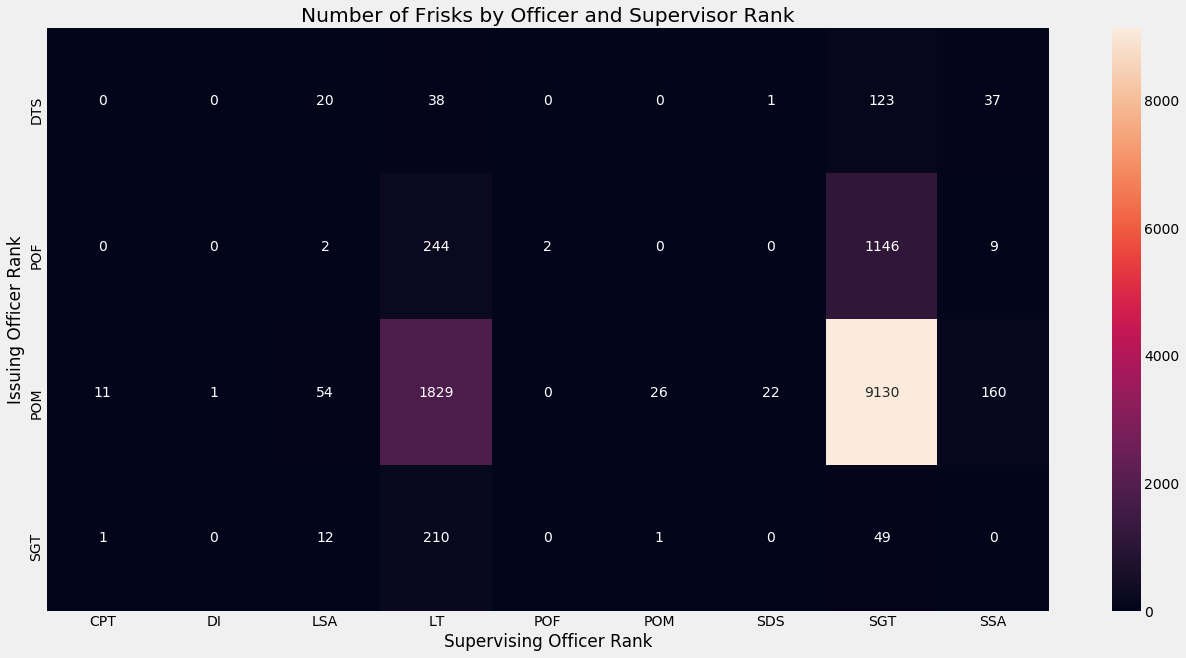

In [73]:
officer_relationship = pd.pivot_table(data = officers_subset, index = 'issuing_officer_rank',
                                      values = 'frisked_flag', columns = 'supervising_officer_rank', aggfunc = 'count').fillna(0).astype(int)


fig, ax = plt.subplots(figsize=(20, 10))
heatmap = sns.heatmap(officer_relationship,  annot=True,  fmt='g')
plt.title("Number of Frisks by Officer and Supervisor Rank")
plt.xlabel('Supervising Officer Rank')
plt.ylabel('Issuing Officer Rank');

More importantly, there seems to be relationships between POM and their higher authorities which in general are Lieutenants (LT) and Sergeants (SGT). This makes sense as these groups are assumingly out on the field the most.

In [45]:
# sns.barplot(data = by_officer, x = by_officer.index, y = 'Success Rate')
# plt.title('Success Rate of Officers Finding a Weapon by Position')
# plt.ylabel('Success Rate')
# plt.xlabel('Issuing Officer Rank');